In [21]:
import TS
import matplotlib.pyplot as plt

In [ ]:
#importing packages
import numpy as np
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
import scipy.optimize as spop
import matplotlib.pyplot as plt

def runSim(stock1, stock2):
    interface = 0
    #specifying parameters
    stocks = [stock1,stock2]
    start = '2019-12-31'
    end = '2021-03-08'
    fee = 0.001
    window = 252
    t_threshold = -2.5
    #retrieving data
    data = pd.DataFrame()
    returns = pd.DataFrame()
    for stock in stocks:
        prices = yf.download(stock, start, end)
        data[stock] = prices['Close']
        returns[stock] = np.append(data[stock][1:].reset_index(drop=True)/data[stock][:-1].reset_index(drop=True) - 1 , 0)

    #initialising arrays
    gross_returns = np.array([])
    net_returns = np.array([])
    t_s = np.array([])
    stock1 = stocks[0]
    stock2 = stocks[1]
    #moving through the sample
    for t in range(window, len(data)):
        #defining the unit root function: stock2 = a + b*stock1
        def unit_root(b):
            a = np.average(data[stock2][t-window:t] - b*data[stock1][t-window:t])
            fair_value = a + b*data[stock1][t-window:t]
            diff = np.array(fair_value - data[stock2][t-window:t])
            diff_diff = diff[1:] - diff[:-1]
            reg = sm.OLS(diff_diff, diff[:-1])
            res = reg.fit()
            return res.params[0]/res.bse[0]
        #optimising the cointegration equation parameters
        res1 = spop.minimize(unit_root, data[stock2][t]/data[stock1][t], method='Nelder-Mead')
        t_opt = res1.fun
        b_opt = float(res1.x)
        a_opt = np.average(data[stock2][t-window:t] - b_opt*data[stock1][t-window:t])
        #simulating trading
        fair_value = a_opt + b_opt*data[stock1][t]
        if t == window:
            old_signal = 0
        if t_opt > t_threshold:
            signal = 0
            gross_return = 0
        else:
            signal = np.sign(fair_value - data[stock2][t])
            gross_return = signal*returns[stock2][t] - signal*returns[stock1][t]
        fees = fee*abs(signal - old_signal)
        net_return = gross_return - fees
        gross_returns = np.append(gross_returns, gross_return)
        net_returns = np.append(net_returns, net_return)
        t_s = np.append(t_s, t_opt)

        #interface: reporting daily positions and realised returns
        if interface == 1:
            print('day '+str(data.index[t]))
            print('')
            if signal == 0:
                print('no trading')
            elif  signal == 1:
                print('long position on '+stock2+' and short position on '+stock1)
            else:
                print('long position on '+stock1+' and short position on '+stock2)
            print('gross daily return: '+str(round(gross_return*100,2))+'%')
            print('net daily return: '+str(round(net_return*100,2))+'%')
            print('cumulative net return so far: '+str(round(np.prod(1+net_returns)*100-100,2))+'%')
            print('')
        old_signal = signal
    #plotting equity curves
    return (np.append(1,np.cumprod(1+gross_returns))), (np.append(1,np.cumprod(1+net_returns)))

def plotSim(stock1, stock2):
    equity_curve_gross, equity_curve_net = runSim(stock1, stock2)
    plt.plot(equity_curve_gross, label='gross returns')
    plt.plot(equity_curve_net, label='net returns')
    plt.legend()
    plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
C:\Users\ryanp\AppData\Local\Temp\ipykernel_36060\3369208197.py:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_opt = float(res1.x)


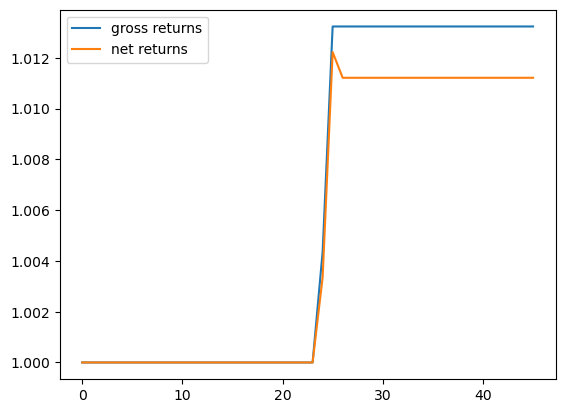

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
C:\Users\ryanp\AppData\Local\Temp\ipykernel_36060\3369208197.py:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_opt = float(res1.x)


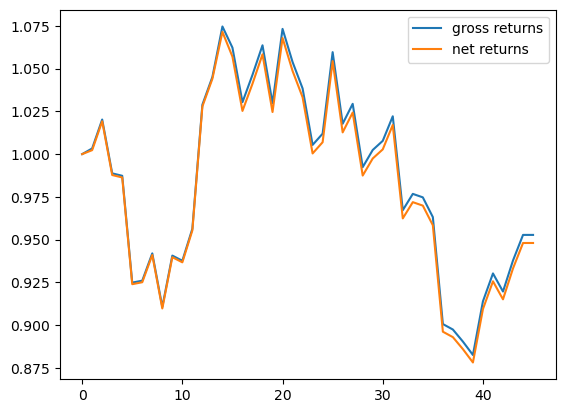

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
C:\Users\ryanp\AppData\Local\Temp\ipykernel_36060\3369208197.py:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_opt = float(res1.x)


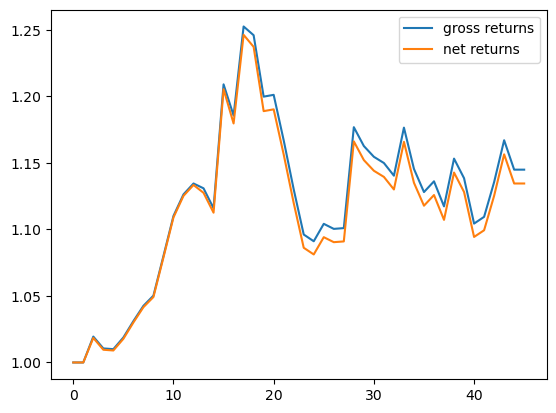

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
C:\Users\ryanp\AppData\Local\Temp\ipykernel_36060\3369208197.py:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_opt = float(res1.x)


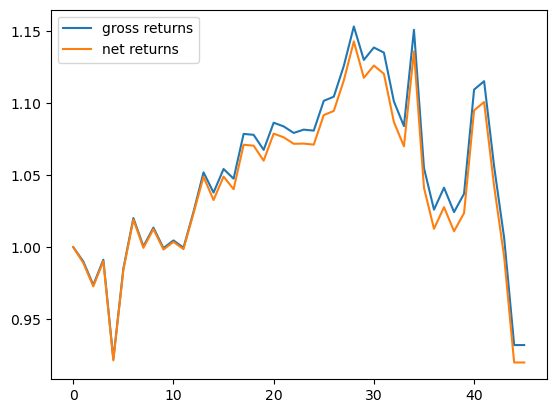

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
C:\Users\ryanp\AppData\Local\Temp\ipykernel_36060\3369208197.py:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_opt = float(res1.x)


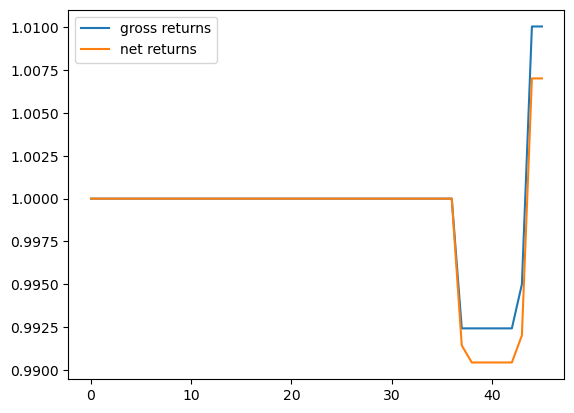

In [32]:
stocks = [(   'G',   'UIS'),
            ('ASGN', 'FORTY'),
            ( 'IBM',   'VYX'),
            (  'FI',  'GLOB'),
            ('EXLS', 'FORTY')]
for stock1, stock2 in stocks:
    plotSim(stock1, stock2)